let's dive into **Topic 10: K-Nearest Neighbors (KNN)**. This is a conceptually simple yet powerful algorithm that can be used for both classification and regression tasks.


---

**1. Introduction: What is K-Nearest Neighbors (KNN)?**

* **Instance-Based (or Memory-Based) Learning:** KNN is an example of an instance-based learning algorithm. This means it doesn't try to learn an explicit function (like $y = mx+c$ in linear regression) from the training data during a distinct "training phase." Instead, it **memorizes the entire training dataset**. The actual "work" or computation happens when a prediction is requested for a new, unseen instance.
* **Non-Parametric:** KNN is a non-parametric method. This means it makes no strong assumptions about the underlying data distribution (e.g., it doesn't assume the data is normally distributed or that the relationship between features is linear). This makes it flexible and capable of learning complex patterns.
* **Lazy Learner:** Because it defers computation until prediction time, KNN is also known as a "lazy learner" (as opposed to "eager learners" like linear regression or decision trees, which build a model upfront).

---

**2. How KNN Works (The Intuition - "Tell me who your friends are, and I'll tell you who you are")**

The core idea behind KNN is that similar things exist in close proximity. Or, more formally, instances that are "near" each other in the feature space are likely to have similar properties or belong to the same class.

* **For Classification:**
    1.  **Choose K:** Select a positive integer `K` (the number of nearest neighbors).
    2.  **Calculate Distances:** When you want to classify a new, unseen data point:
        * Calculate the distance from this new point to *every single point* in the training dataset.
    3.  **Find K Nearest Neighbors:** Identify the `K` training data points that are closest (have the smallest distances) to the new point.
    4.  **Majority Vote:** Assign the class label to the new data point that is most frequent among these `K` neighbors. For example, if K=5 and 3 of the 5 nearest neighbors belong to Class A and 2 belong to Class B, the new point is classified as Class A. (It's common to choose an odd K for binary classification to avoid ties).

* **For Regression:**
    1.  **Choose K and Calculate Distances:** Steps 1 and 2 are the same as in classification.
    2.  **Find K Nearest Neighbors:** Step 3 is the same.
    3.  **Average/Median:** The predicted value for the new data point is typically the **average** (or sometimes the median) of the target values of its `K` nearest neighbors.

---

**3. Distance Metrics**

The concept of "nearness" or "similarity" is quantified using a distance metric. The choice of metric can significantly impact KNN's performance.
* **Euclidean Distance (L2 norm):** This is the most common default. It's the straight-line distance between two points $p = (p_1, ..., p_n)$ and $q = (q_1, ..., q_n)$ in an n-dimensional space.
    $$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$
* **Manhattan Distance (L1 norm, City Block Distance):** The sum of the absolute differences of their coordinates.
    $$d(p, q) = |p_1 - q_1| + |p_2 - q_2| + \dots + |p_n - q_n| = \sum_{i=1}^{n} |p_i - q_i|$$
    This can be useful when features represent different units or types, or in high-dimensional spaces where Euclidean distance can be less intuitive.
* **Minkowski Distance:** A generalization that includes both Euclidean and Manhattan distances.
    $$d(p, q) = \left(\sum_{i=1}^{n} |p_i - q_i|^m\right)^{1/m}$$
    * If $m=1$, it's Manhattan distance.
    * If $m=2$, it's Euclidean distance.
* **Other Metrics:** Depending on the data type, other metrics like Hamming distance (for categorical features) or cosine similarity (for text data) might be used.

**Crucial Point: Feature Scaling**
KNN is highly sensitive to the scale of the features. If one feature has a much larger range of values than another (e.g., age from 0-100 vs. income from 20,000-200,000), that feature will dominate the distance calculation. Therefore, **it's almost always essential to scale your features (e.g., using StandardScaler or MinMaxScaler) before applying KNN.**

---

**4. Choosing the Value of 'K' (Hyperparameter)**

`K`, the number of neighbors, is a critical hyperparameter.
* **Small `K` (e.g., K=1):**
    * The model is very flexible and can capture fine-grained patterns.
    * However, it's highly sensitive to noise and outliers in the training data (high variance). Decision boundaries can be very irregular.
* **Large `K`:**
    * The model becomes smoother and more robust to noise (lower variance).
    * However, if `K` is too large, it can oversmooth the decision boundary and fail to capture local structures (higher bias, leading to underfitting). For example, if `K` equals the total number of training samples, it would always predict the majority class (for classification) or the global average (for regression).
* **Finding Optimal `K`:**
    * There's no one-size-fits-all `K`. It's data-dependent.
    * **Cross-validation** is the standard method: Try different values of `K`, evaluate performance on validation sets, and pick the `K` that yields the best result.
    * A common rule of thumb is $K = \sqrt{N}$ where $N$ is the number of training samples, but this is just a rough guideline.
    * For binary classification, an odd value of `K` is often preferred to avoid ties in the majority vote.

---

**5. Pros and Cons of KNN**

* **Pros:**
    * **Simple to understand and implement:** The algorithm's logic is very intuitive.
    * **No explicit training phase:** Or very fast, as it just involves storing the dataset.
    * **Naturally handles multi-class classification.**
    * **Flexible decision boundaries:** Can learn complex, non-linear decision boundaries.
    * **Non-parametric:** Makes no strong assumptions about the underlying data distribution.
* **Cons:**
    * **Computationally expensive at prediction time:** For each new prediction, it needs to calculate distances to *all* training points. This can be very slow for large datasets. (Techniques like KD-Trees or Ball Trees, which Scikit-learn can use, help optimize neighbor searches but have their own limitations).
    * **Requires significant memory:** Needs to store the entire training dataset.
    * **Highly sensitive to feature scaling:** Features must be scaled appropriately.
    * **Sensitive to irrelevant or redundant features ("Curse of Dimensionality"):** If many features are irrelevant, they can distort the distance calculations and degrade performance. In high-dimensional spaces:
        * The concept of "distance" becomes less meaningful (points tend to be almost equidistant).
        * The volume of the space increases so much that data becomes sparse, making it hard to find truly "near" neighbors.
    * **Performance depends on the choice of `K` and the distance metric.**

---


**6. Implementation with Scikit-learn**

Let's look at two examples: one for classification and one for regression.

**Example 1: KNN for Classification**

We'll use the Iris dataset, which has 3 classes of Iris flowers. For simplicity in visualization potential, we might focus on 2 features, but the code will use all.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Iris Dataset Loaded.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")
print(f"Target names: {target_names}")

Iris Dataset Loaded.
Features shape: (150, 4), Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# --- 2. Split Data ---
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# --- 3. Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
print("\nData Scaled.")


Data Scaled.


In [5]:
# --- 4. KNN Classifier - Basic Implementation ---
k_value = 5 # Example K
knn_clf = KNeighborsClassifier(n_neighbors=k_value)
knn_clf.fit(X_train, y_train) # KNN 'fit' mostly just stores the data

y_pred_clf = knn_clf.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_clf)
print(f"\n--- KNN Classifier (K={k_value}) ---")
print(f"Accuracy: {accuracy_basic:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred_clf, target_names=target_names))


--- KNN Classifier (K=5) ---
Accuracy: 0.9111


In [6]:
# --- 5. Finding Optimal K using GridSearchCV ---
print("\n--- Finding Optimal K for KNN Classifier using GridSearchCV ---")
param_grid_clf = {'n_neighbors': np.arange(1, 26)} # Test K from 1 to 25
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid_clf, cv=5, scoring='accuracy')
knn_gscv.fit(X_train, y_train)

best_k_clf = knn_gscv.best_params_['n_neighbors']
print(f"Best K found by GridSearchCV: {best_k_clf}")
print(f"Best cross-validated accuracy: {knn_gscv.best_score_:.4f}")


--- Finding Optimal K for KNN Classifier using GridSearchCV ---
Best K found by GridSearchCV: 14
Best cross-validated accuracy: 0.9714



--- KNN Classifier (Best K=14) Evaluation ---
Test Set Accuracy: 0.9556
Confusion Matrix:


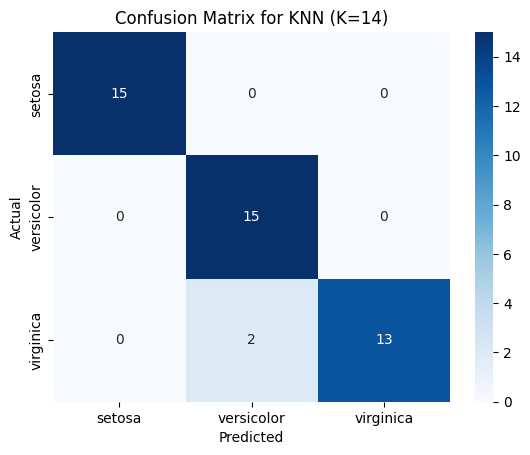

In [7]:
# Evaluate the best model from GridSearchCV on the test set
best_knn_clf = knn_gscv.best_estimator_
y_pred_best_clf = best_knn_clf.predict(X_test)
accuracy_best_clf = accuracy_score(y_test, y_pred_best_clf)

print(f"\n--- KNN Classifier (Best K={best_k_clf}) Evaluation ---")
print(f"Test Set Accuracy: {accuracy_best_clf:.4f}")
print("Confusion Matrix:")
cm_clf = confusion_matrix(y_test, y_pred_best_clf)
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for KNN (K={best_k_clf})")
plt.show()


In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred_best_clf, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



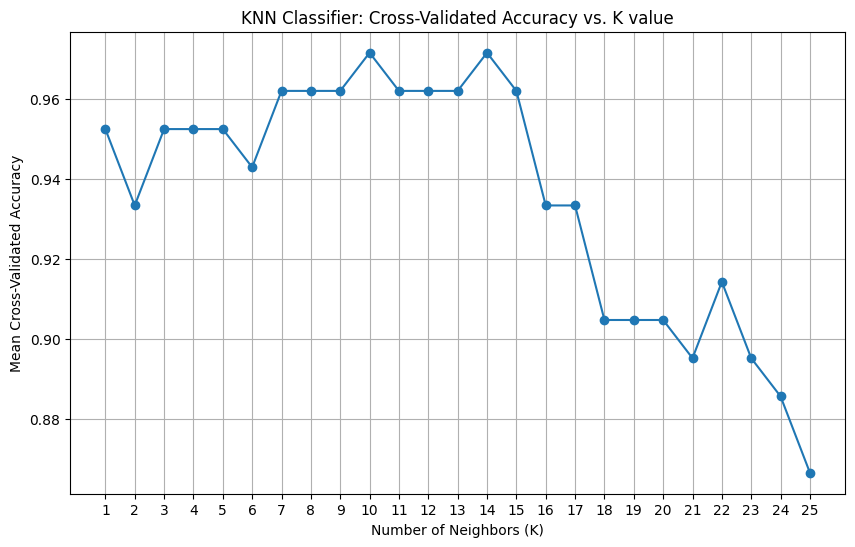

In [9]:
# Plotting cross-validation results (accuracy vs. K)
cv_results = knn_gscv.cv_results_
mean_scores = cv_results['mean_test_score']
k_values = param_grid_clf['n_neighbors']

plt.figure(figsize=(10,6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('KNN Classifier: Cross-Validated Accuracy vs. K value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

---
**Example 2: KNN for Classification**

For this example, we'll use the Breast Cancer Wisconsin (Diagnostic) dataset, which is a binary classification problem (predicting whether a tumor is malignant or benign).

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names # ['malignant' 'benign']

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")
print(f"Class distribution: Malignant (0): {np.sum(y==0)}, Benign (1): {np.sum(y==1)}")

Breast Cancer Dataset Loaded.
Features shape: (569, 30), Target shape: (569,)
Class distribution: Malignant (0): 212, Benign (1): 357


In [12]:
# --- 2. Split Data ---
# Stratify ensures that the class proportion is similar in train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)


In [13]:
# --- 3. Feature Scaling ---
# KNN is distance-based, so scaling is crucial
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
print("\nData Scaled.")



Data Scaled.


In [14]:
# --- 4. Finding Optimal K for KNN Classifier using GridSearchCV ---
print("\n--- Finding Optimal K for KNN Classifier (Breast Cancer) using GridSearchCV ---")
# Define a range of K values to test
param_grid_clf = {'n_neighbors': np.arange(1, 31)} # Test K from 1 to 30

# Instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='accuracy' is a common metric for classification
knn_gscv_cancer = GridSearchCV(KNeighborsClassifier(), param_grid_clf, cv=5, scoring='accuracy')
knn_gscv_cancer.fit(X_train, y_train)

best_k_cancer = knn_gscv_cancer.best_params_['n_neighbors']
print(f"Best K found by GridSearchCV: {best_k_cancer}")
print(f"Best cross-validated accuracy: {knn_gscv_cancer.best_score_:.4f}")



--- Finding Optimal K for KNN Classifier (Breast Cancer) using GridSearchCV ---
Best K found by GridSearchCV: 3
Best cross-validated accuracy: 0.9673



--- KNN Classifier (Best K=3) Evaluation on Breast Cancer Test Set ---
Test Set Accuracy: 0.9532

Confusion Matrix:


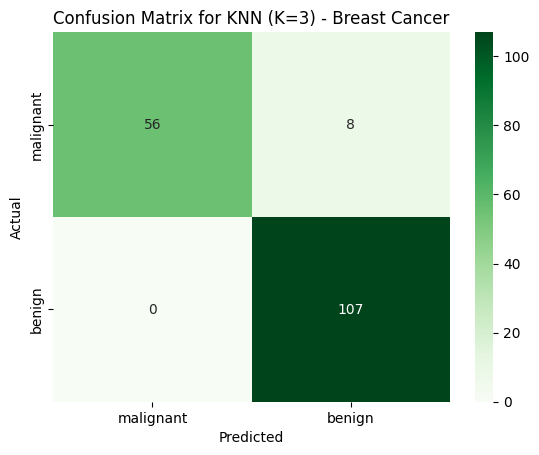


Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.88      0.93        64
      benign       0.93      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [15]:
# --- 5. Evaluate the Best Model on the Test Set ---
best_knn_clf_cancer = knn_gscv_cancer.best_estimator_ # This is the model with the best K
y_pred_best_cancer = best_knn_clf_cancer.predict(X_test)
accuracy_best_cancer = accuracy_score(y_test, y_pred_best_cancer)

print(f"\n--- KNN Classifier (Best K={best_k_cancer}) Evaluation on Breast Cancer Test Set ---")
print(f"Test Set Accuracy: {accuracy_best_cancer:.4f}")

print("\nConfusion Matrix:")
cm_cancer = confusion_matrix(y_test, y_pred_best_cancer)
sns.heatmap(cm_cancer, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for KNN (K={best_k_cancer}) - Breast Cancer")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_cancer, target_names=target_names))


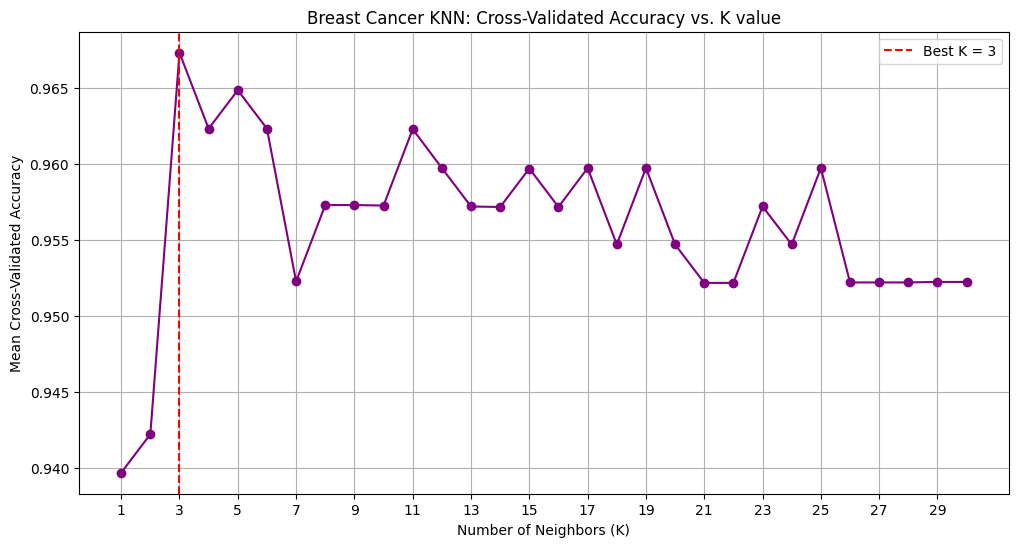

In [16]:
# --- Plotting cross-validation results (accuracy vs. K) ---
cv_results_cancer = knn_gscv_cancer.cv_results_
mean_scores_cancer = cv_results_cancer['mean_test_score']
k_values_cancer = param_grid_clf['n_neighbors']

plt.figure(figsize=(12, 6))
plt.plot(k_values_cancer, mean_scores_cancer, marker='o', linestyle='-', color='purple')
plt.title('Breast Cancer KNN: Cross-Validated Accuracy vs. K value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values_cancer[::2]) # Show every other K value for clarity
plt.axvline(best_k_cancer, linestyle='--', color='red', label=f'Best K = {best_k_cancer}')
plt.legend()
plt.grid(True)
plt.show()

**Discussion for Breast Cancer KNN Classification:**

- This example demonstrates KNN on a binary classification task with real-world medical data. 
- You'll observe how GridSearchCV helps find an optimal K by evaluating different K values using cross-validation. 
- The final confusion matrix and classification report give a detailed breakdown of the model's performance in distinguishing malignant from benign     tumors. 
- The plot of accuracy vs. K visualizes the process of selecting the best K.

---
**Example 3: KNN for Regression**

We'll create a simple synthetic 1D dataset with a non-linear (e.g., sine wave) trend.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler # Good practice even for 1D if generalizable
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# --- 1. Generate Synthetic Non-Linear Data for Regression ---
np.random.seed(42)
n_samples_reg = 100
X_reg = np.sort(10 * np.random.rand(n_samples_reg, 1), axis=0) # Feature values between 0 and 10
y_reg = np.sin(X_reg).ravel() + np.random.randn(n_samples_reg) * 0.2 # y = sin(x) + noise

print("\nSynthetic Regression Dataset Created.")



Synthetic Regression Dataset Created.


In [19]:
# --- 2. Split Data ---
X_train_reg_raw, X_test_reg_raw, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [20]:
# --- 3. Feature Scaling (Good practice, though less critical for single unscaled feature in this range) ---
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg_raw)
X_test_reg = scaler_reg.transform(X_test_reg_raw)
print("Regression Data Scaled.")


Regression Data Scaled.


In [21]:
# --- 4. KNN Regressor - Basic Implementation ---
k_reg_value = 5 # Example K
knn_reg = KNeighborsRegressor(n_neighbors=k_reg_value)
knn_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_reg.predict(X_test_reg)
mse_basic_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_basic_reg = r2_score(y_test_reg, y_pred_reg)
print(f"\n--- KNN Regressor (K={k_reg_value}) ---")
print(f"MSE: {mse_basic_reg:.4f}, R2: {r2_basic_reg:.4f}")



--- KNN Regressor (K=5) ---
MSE: 0.0407, R2: 0.8975


In [22]:
# --- 5. Finding Optimal K for KNN Regressor using GridSearchCV ---
print("\n--- Finding Optimal K for KNN Regressor using GridSearchCV ---")
param_grid_reg = {'n_neighbors': np.arange(1, 21)} # Test K from 1 to 20
# For regression, scoring could be 'neg_mean_squared_error' (higher is better) or 'r2'
knn_reg_gscv = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='r2')
knn_reg_gscv.fit(X_train_reg, y_train_reg)

best_k_reg = knn_reg_gscv.best_params_['n_neighbors']
print(f"Best K found by GridSearchCV: {best_k_reg}")
print(f"Best cross-validated R2 score: {knn_reg_gscv.best_score_:.4f}")


--- Finding Optimal K for KNN Regressor using GridSearchCV ---
Best K found by GridSearchCV: 4
Best cross-validated R2 score: 0.7931


In [23]:
# Evaluate the best model from GridSearchCV on the test set
best_knn_reg = knn_reg_gscv.best_estimator_
y_pred_best_reg = best_knn_reg.predict(X_test_reg)
mse_best_reg = mean_squared_error(y_test_reg, y_pred_best_reg)
r2_best_reg = r2_score(y_test_reg, y_pred_best_reg)

print(f"\n--- KNN Regressor (Best K={best_k_reg}) Evaluation ---")
print(f"Test Set MSE: {mse_best_reg:.4f}")
print(f"Test Set R2 Score: {r2_best_reg:.4f}")



--- KNN Regressor (Best K=4) Evaluation ---
Test Set MSE: 0.0368
Test Set R2 Score: 0.9074


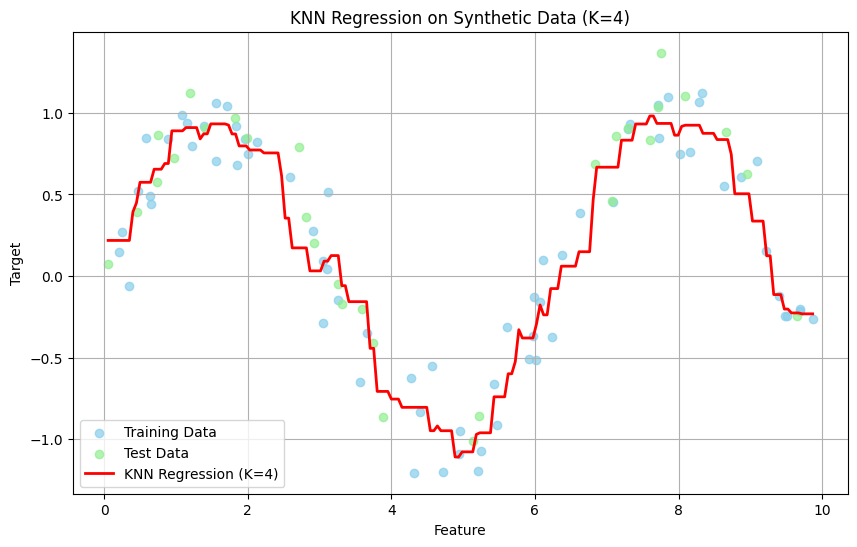

In [24]:
# --- Plotting the results for KNN Regression ---
# Create points for plotting the regression line
X_plot_reg_raw = np.linspace(X_reg.min(), X_reg.max(), 200).reshape(-1, 1)
X_plot_reg = scaler_reg.transform(X_plot_reg_raw) # Scale these plot points too
y_plot_reg = best_knn_reg.predict(X_plot_reg)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_reg_raw, y_train_reg, color='skyblue', label='Training Data', alpha=0.7)
plt.scatter(X_test_reg_raw, y_test_reg, color='lightgreen', label='Test Data', alpha=0.7)
plt.plot(X_plot_reg_raw, y_plot_reg, color='red', linewidth=2, label=f'KNN Regression (K={best_k_reg})')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title(f'KNN Regression on Synthetic Data (K={best_k_reg})')
plt.legend()
plt.grid(True)
plt.show()

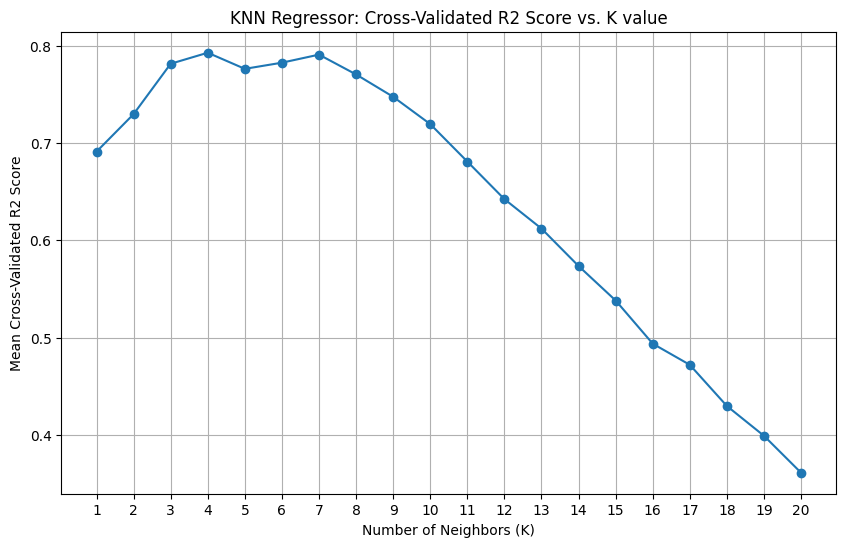

In [26]:
# Plotting cross-validation results (R2 vs. K) for regression
cv_results_reg = knn_reg_gscv.cv_results_
mean_scores_reg = cv_results_reg['mean_test_score']
k_values_reg = param_grid_reg['n_neighbors']

plt.figure(figsize=(10,6))
plt.plot(k_values_reg, mean_scores_reg, marker='o', linestyle='-')
plt.title('KNN Regressor: Cross-Validated R2 Score vs. K value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated R2 Score')
plt.xticks(k_values_reg)
plt.grid(True)
plt.show()

---
**Example 4: KNN for Regression**

For this example, we'll use the California Housing dataset to predict median house values. This is a multi-dimensional real-world regression problem.


In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("\nCalifornia Housing Dataset Loaded.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")


California Housing Dataset Loaded.
Features shape: (20640, 8), Target shape: (20640,)


In [30]:
# --- 2. Split Data ---
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

In [31]:
# --- 3. Feature Scaling ---
# Crucial for KNN, especially with features of different scales
scaler_housing = StandardScaler()
X_train = scaler_housing.fit_transform(X_train_raw)
X_test = scaler_housing.transform(X_test_raw)
print("\nHousing Data Scaled.")


Housing Data Scaled.


In [32]:
# --- 4. Finding Optimal K for KNN Regressor using GridSearchCV ---
print("\n--- Finding Optimal K for KNN Regressor (California Housing) using GridSearchCV ---")
# Define a range of K values to test
param_grid_reg = {'n_neighbors': np.arange(1, 21)} # Test K from 1 to 20

# Instantiate GridSearchCV
# For regression, scoring could be 'neg_mean_squared_error' (higher is better, as MSE is an error)
# or 'r2' (closer to 1 is better).
knn_gscv_housing = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='r2')
# Note: GridSearchCV can be slow on larger datasets. Consider reducing cv folds or param_grid range for speed.
knn_gscv_housing.fit(X_train, y_train)

best_k_housing = knn_gscv_housing.best_params_['n_neighbors']
print(f"Best K found by GridSearchCV: {best_k_housing}")
print(f"Best cross-validated R2 score: {knn_gscv_housing.best_score_:.4f}")


--- Finding Optimal K for KNN Regressor (California Housing) using GridSearchCV ---
Best K found by GridSearchCV: 11
Best cross-validated R2 score: 0.6837



--- KNN Regressor (Best K=11) Evaluation on California Housing Test Set ---
Test Set MSE: 0.4110
Test Set R2 Score: 0.6869


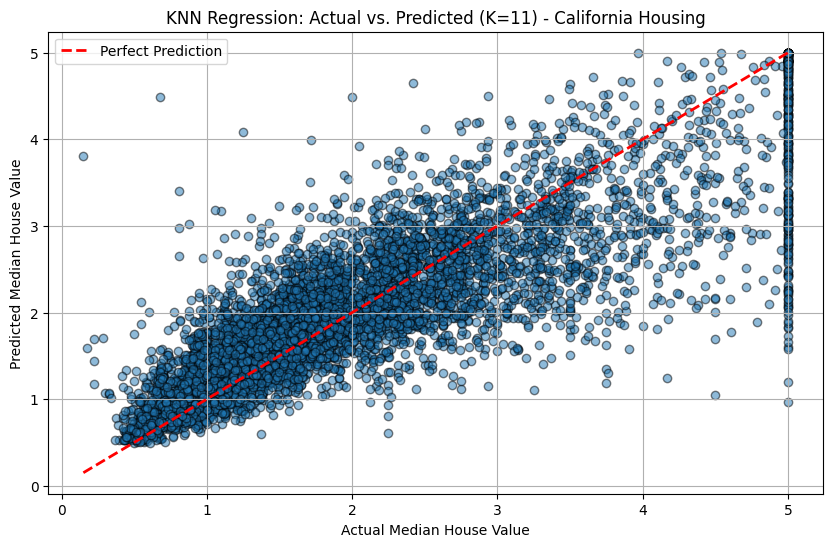

In [33]:
# --- 5. Evaluate the Best Model on the Test Set ---
best_knn_reg_housing = knn_gscv_housing.best_estimator_
y_pred_best_housing = best_knn_reg_housing.predict(X_test)
mse_best_housing = mean_squared_error(y_test, y_pred_best_housing)
r2_best_housing = r2_score(y_test, y_pred_best_housing)

print(f"\n--- KNN Regressor (Best K={best_k_housing}) Evaluation on California Housing Test Set ---")
print(f"Test Set MSE: {mse_best_housing:.4f}")
print(f"Test Set R2 Score: {r2_best_housing:.4f}")

# --- Plotting Predicted vs. Actual values ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_housing, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"KNN Regression: Actual vs. Predicted (K={best_k_housing}) - California Housing")
plt.legend()
plt.grid(True)
plt.show()


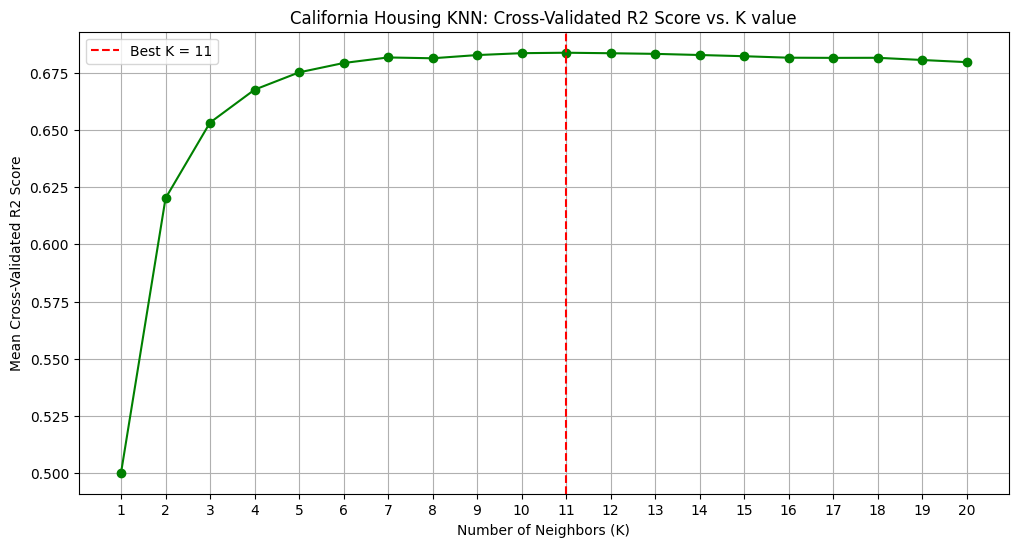

In [34]:
# --- Plotting cross-validation results (R2 vs. K) ---
cv_results_housing = knn_gscv_housing.cv_results_
mean_scores_housing = cv_results_housing['mean_test_score'] # R2 scores
k_values_housing = param_grid_reg['n_neighbors']

plt.figure(figsize=(12, 6))
plt.plot(k_values_housing, mean_scores_housing, marker='o', linestyle='-', color='green')
plt.title('California Housing KNN: Cross-Validated R2 Score vs. K value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated R2 Score')
plt.xticks(k_values_housing)
plt.axvline(best_k_housing, linestyle='--', color='red', label=f'Best K = {best_k_housing}')
plt.legend()
plt.grid(True)
plt.show()

**Discussion for California Housing KNN Regression:**
- This example applies KNN to a more complex, multi-feature regression task.

- Feature Scaling is demonstrably important here due to the varied scales of the housing features.
- GridSearchCV helps find an optimal K. The R-squared metric is used for scoring.
- The scatter plot of actual vs. predicted values gives a visual sense of how well the model is performing. Ideally, points should cluster around the diagonal line representing perfect predictions.
- The plot of R2 vs. K shows how the model's predictive power changes with K. You might observe that KNN, while capable, might not achieve as high an R2 score on this dataset as more specialized regression models like Random Forests or Gradient Boosting, especially if the underlying relationships are very complex or involve intricate feature interactions that KNN's distance-based approach doesn't capture as effectively.


**Key Points from Implementation:**
* **Scaling:** `StandardScaler` is used before fitting KNN.
* **`KNeighborsClassifier` / `KNeighborsRegressor`:** These are the Scikit-learn classes. The main hyperparameter is `n_neighbors` (which is K). Others include `weights` ('uniform' or 'distance' - where closer neighbors have more influence) and `metric`.
* **`GridSearchCV`:** This is a convenient way to find the optimal `K` by trying a range of values and using cross-validation.
* **Visualization:** The plots show how performance varies with K and how KNN regression can fit non-linear data.

KNN is a versatile algorithm, but its practical application often requires careful consideration of feature scaling, dimensionality, and the choice of K.